# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing modules and libraries</p>

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
c4=cm.get_cmap('Set3')


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
data=pd.read_excel('/kaggle/input/car-crash-dataset/new dataset.xlsx')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning </p>

In [3]:
data.duplicated().sum()

64

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53879 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53879 non-null  int64  
 1   Month              53879 non-null  int64  
 2   Day                53879 non-null  int64  
 3   Weekend?           53811 non-null  object 
 4   Hour               53654 non-null  float64
 5   Collision Type     53873 non-null  object 
 6   Injury Type        53879 non-null  object 
 7   Primary Factor     52760 non-null  object 
 8   Reported_Location  53844 non-null  object 
 9   Latitude           53849 non-null  float64
 10  Longitude          53849 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.9+ MB


In [6]:
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003])

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **Data contains information from 2003-2015**

In [7]:
data['Collision Type'].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle', nan], dtype=object)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualisation </p>

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Freqeuncies of types of Accident</p>


Text(0.5, 1.0, 'Frequency of type of Accidents')

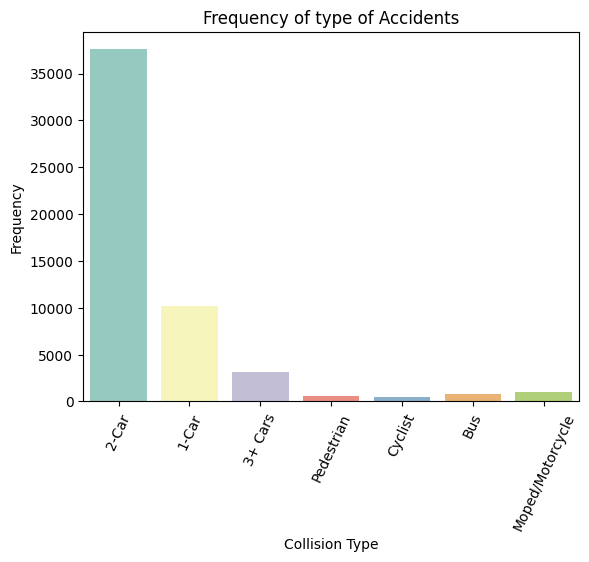

In [8]:
sb.countplot(x=data['Collision Type'],palette='Set3')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Frequency of type of Accidents')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Weekday Vs Weekend</p>


Text(0.5, 1.0, 'Weekday Vs Weekend')

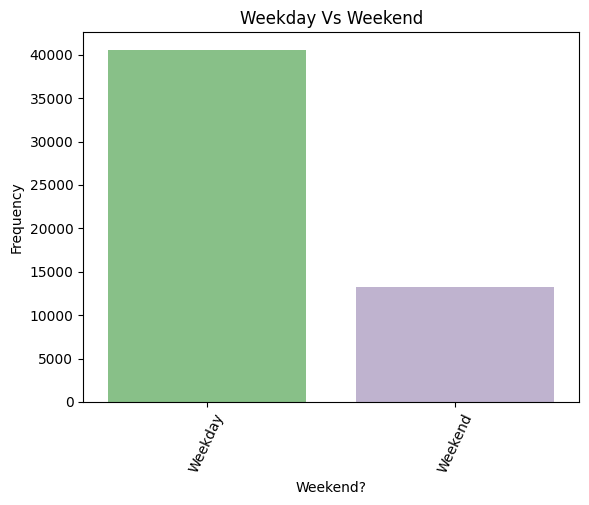

In [9]:
sb.countplot(x=data['Weekend?'],palette='Accent')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Weekday Vs Weekend')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Percentage of Injury in Category</p>


In [10]:
inj_val=data['Injury Type'].value_counts()

Text(0.5, 1.0, 'percentage of Injury in Category')

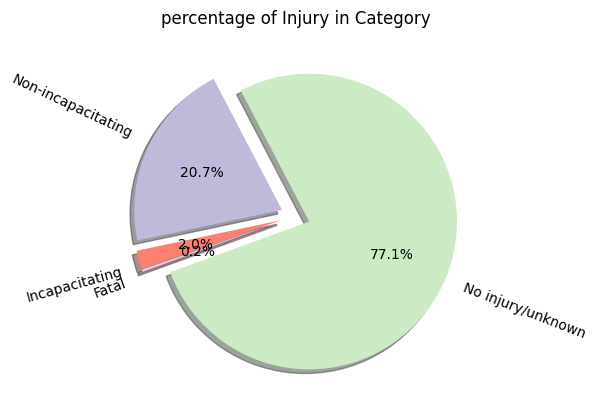

In [11]:
plt.pie(inj_val,labels=inj_val.index,startangle=200,shadow=True,autopct='%1.1f%%',rotatelabels=90,explode=(0.1,0.1,0.1,0.1),colors=[c4(0.9),c4(0.2),c4(0.3),c4(0.6)])
plt.title('percentage of Injury in Category')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Most Common Reason For Accident</p>


In [12]:
data['Primary Factor'].nunique()

55

In [13]:
pfdata=data['Primary Factor'].value_counts().head(20)

Text(0.5, 1.0, 'Most Common Reason For Accident')

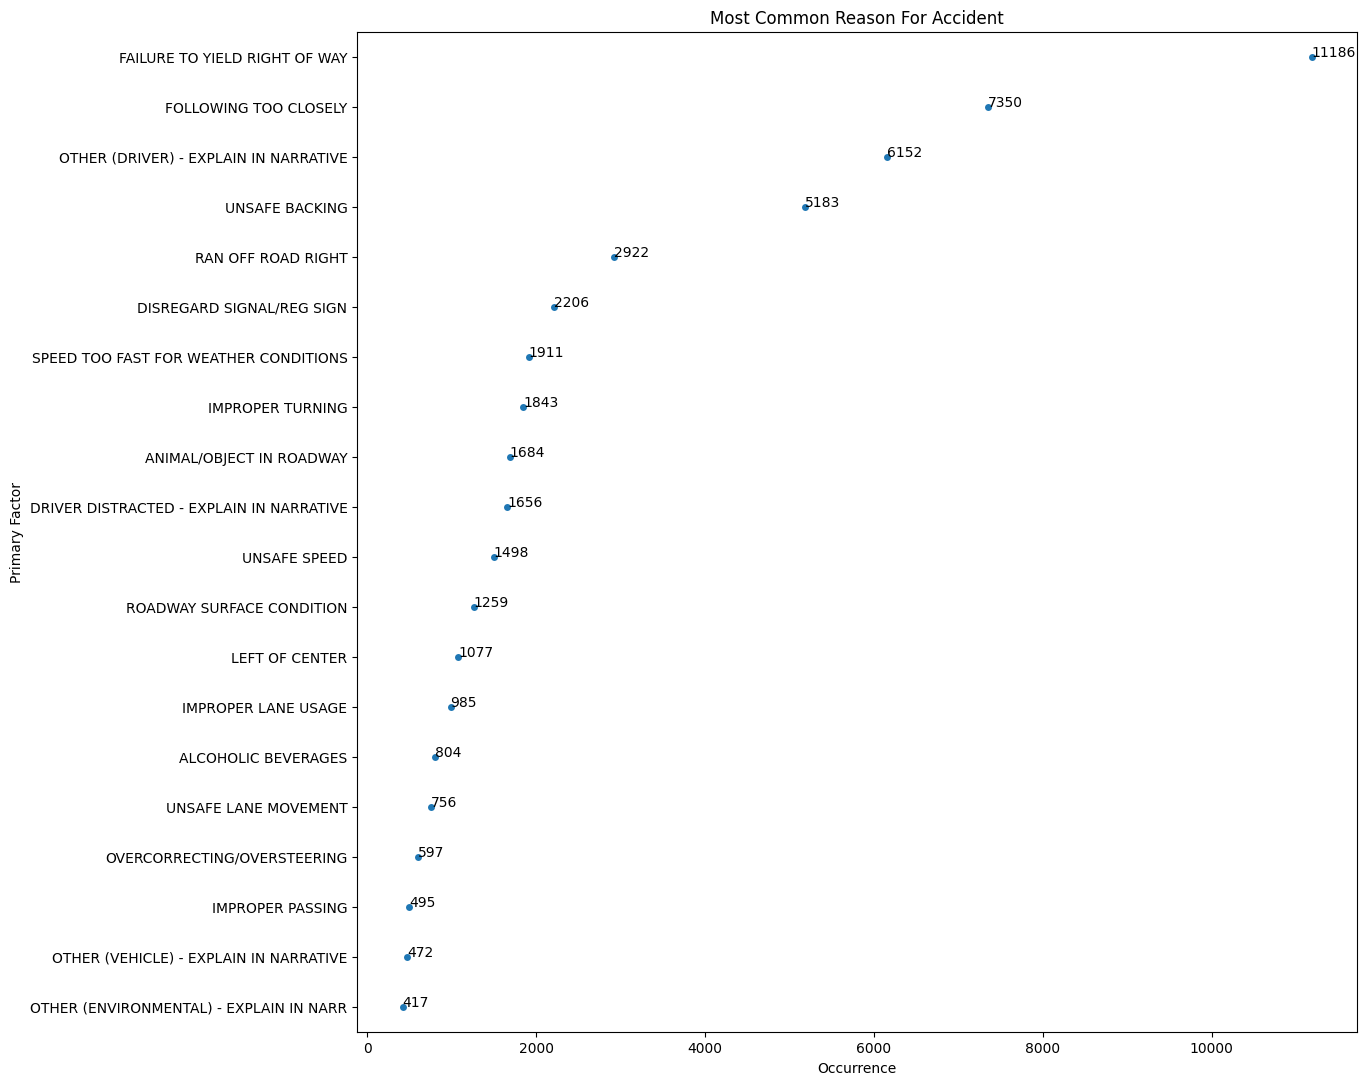

In [14]:
fig=plt.figure(figsize=(10,10))
axis=fig.add_axes([1,1,1,1])
sb.swarmplot(data=pfdata,y=pfdata.index,x=pfdata,ax=axis)
for i,j in enumerate(pfdata):
    axis.text(j,i,j)
plt.xlabel('Occurrence')
plt.title('Most Common Reason For Accident')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Most Frequent Location Of Accident</p>


In [15]:
rldata=data['Reported_Location'].value_counts().head(30)

Text(0.5, 1.0, 'Most Frequent Location Of Accident')

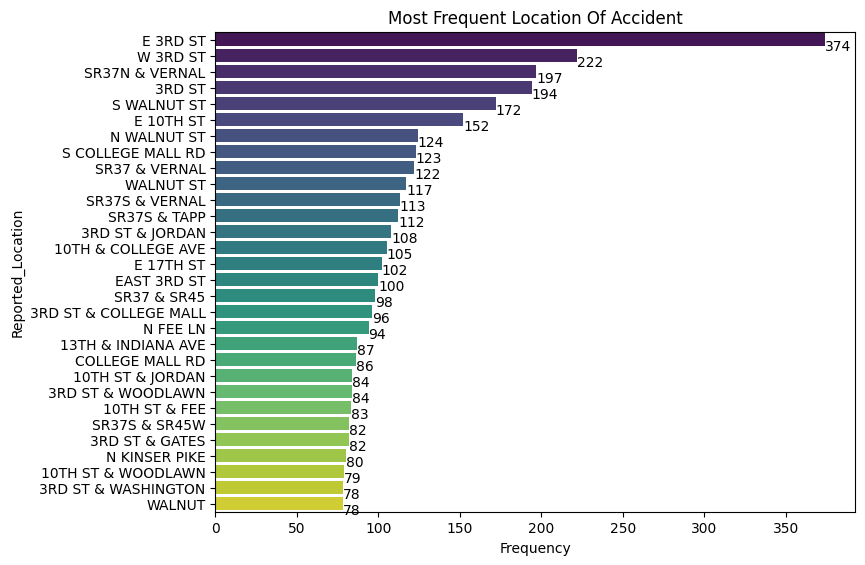

In [16]:
fig1=plt.figure()
axis1=fig1.add_axes([1,1,1,1])
sb.barplot(x=rldata,y=rldata.index,ax=axis1,palette='viridis')
for i,j in enumerate(rldata):
    axis1.text(j,i,j,va='top')
axis1.set_xlabel('Frequency')
axis1.set_title('Most Frequent Location Of Accident')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Collision Types in Different Years</p>


In [17]:

grp=data.groupby('Year')
keys=grp.groups.keys()

In [18]:
infobox=[]
for i in range(2003,2016):
    infobox.append(grp.get_group(i)['Collision Type'].value_counts())

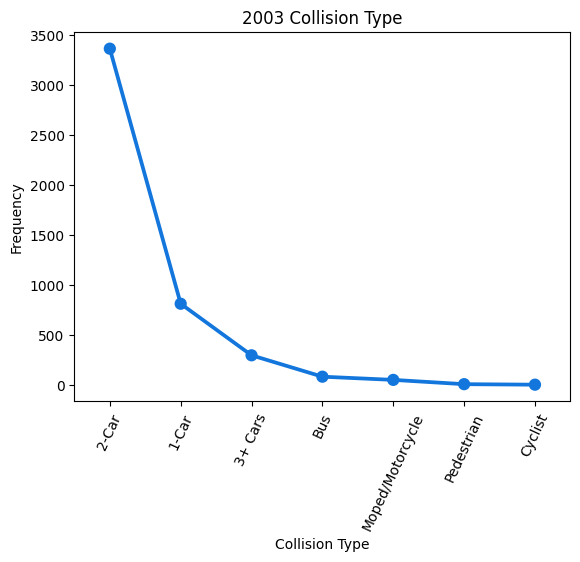

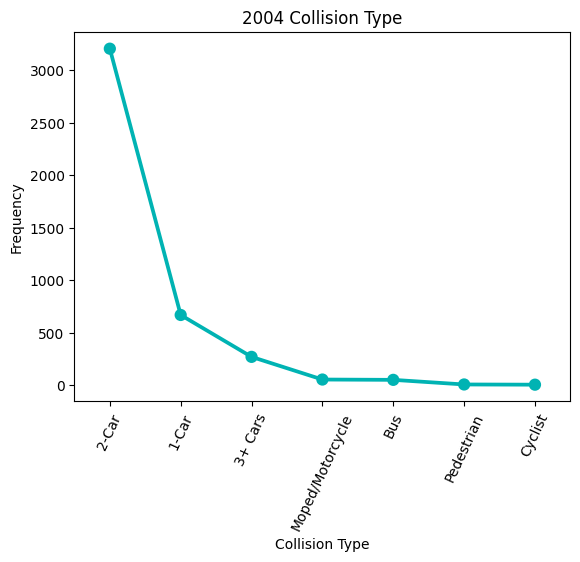

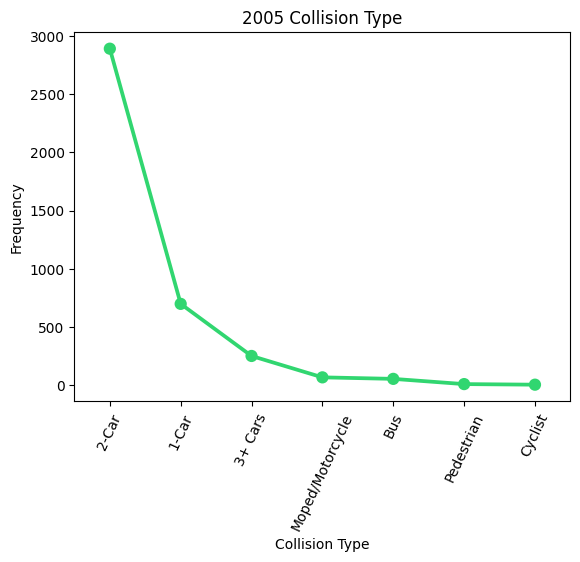

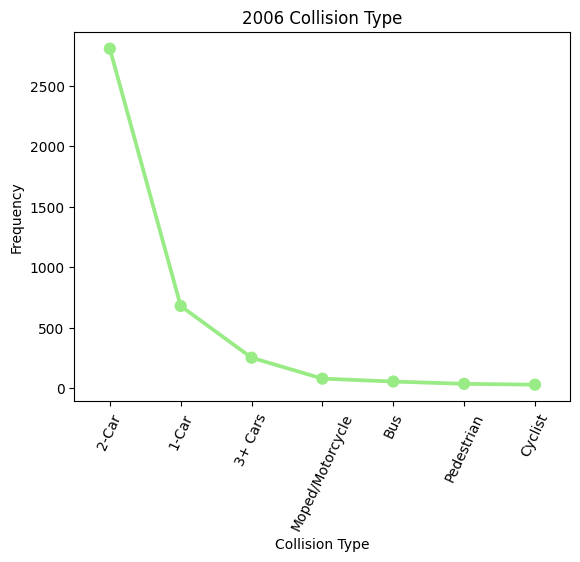

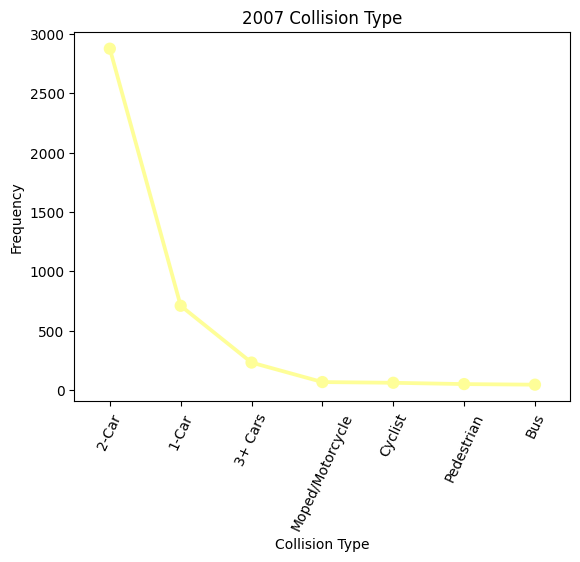

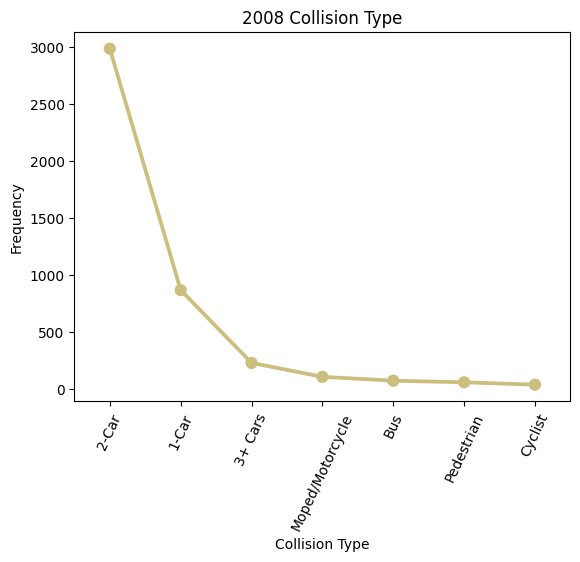

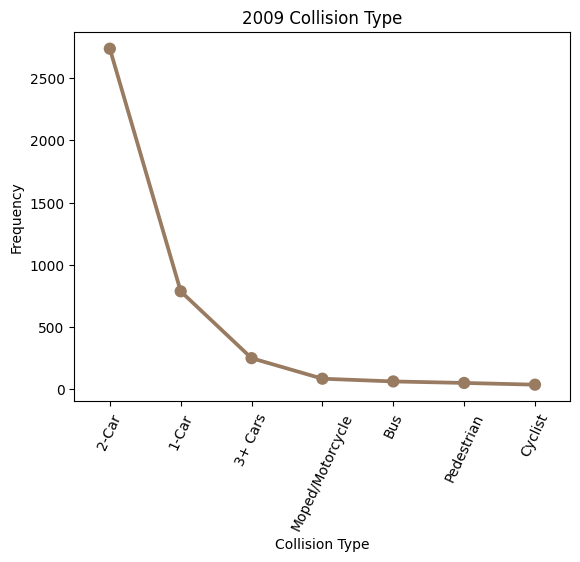

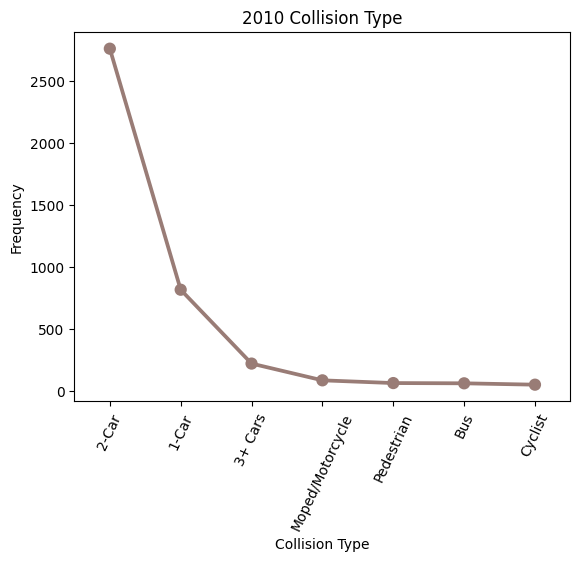

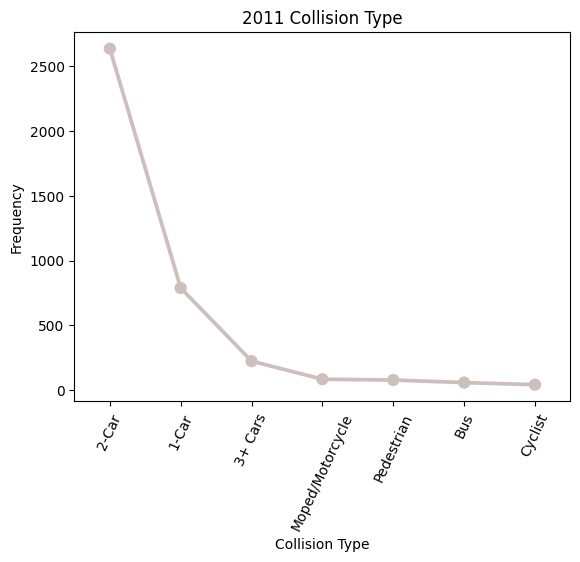

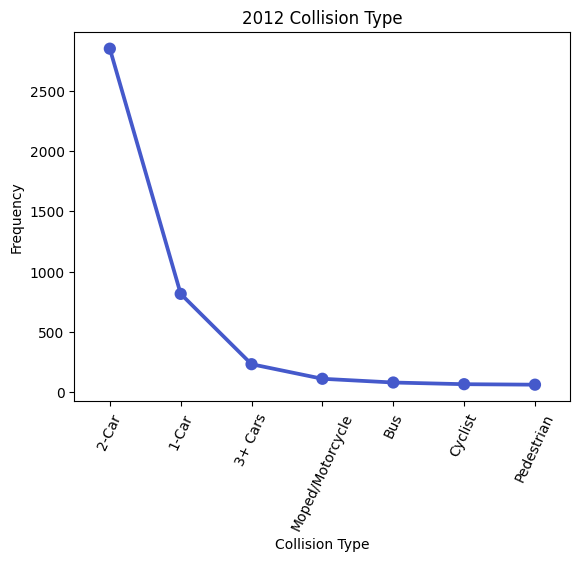

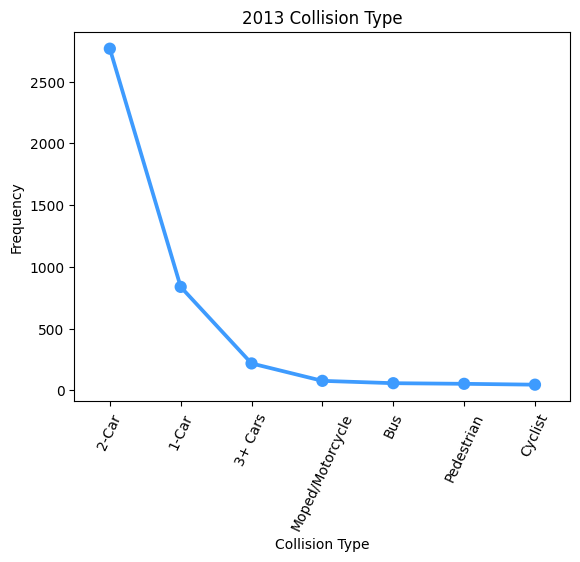

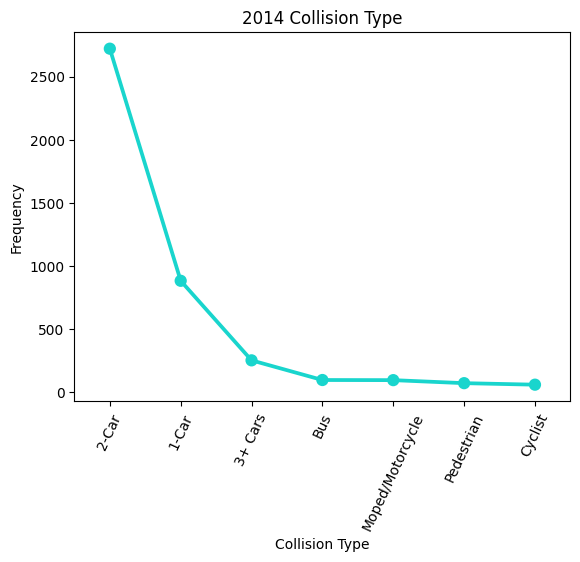

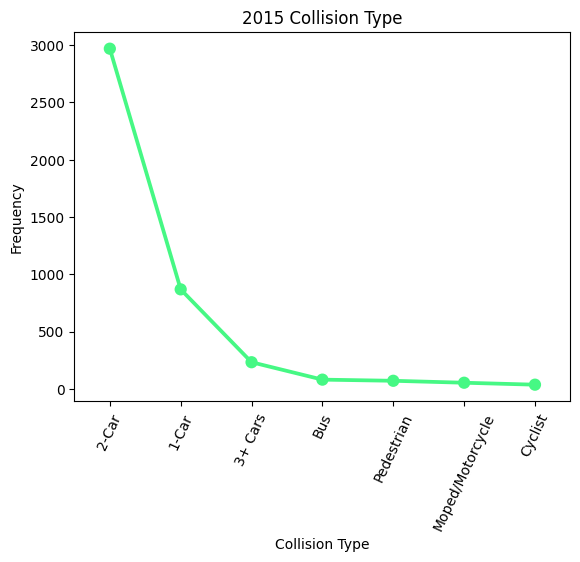

In [19]:
from matplotlib import cm
c2=cm.get_cmap('terrain')
count=0
val=0.1
for i in range(2003,2016):
    
    sb.pointplot(x=infobox[count].index,y=infobox[count],color=c2(val))
    plt.xticks(rotation=65)
    plt.ylabel('Frequency')
    plt.title('%d Collision Type'%(i))
    plt.show()
    count+=1
    val+=0.1
    if val>=0.9:
        c2=cm.get_cmap('turbo')
        val=0.1

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">To be Continue.Thank u for visiting</p>
